[![View notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Grabowski_and_Pawlowska_2023/figure_3.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Grabowski_and_Pawlowska_2023/figure_3.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Grabowski_and_Pawlowska_2023/figure_3.ipynb)

### based on Fig. 3 from Wojciech Grabowski and Hanna Pawlowska 2023 (Geophysical Research Letters 50(3)) 'Adiabatic Evolution of Cloud Droplet Spectral Width: A New Look at an Old Problem'

https://doi.org/10.1029/2022GL101917

In [11]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install "open-atmos-jupyter-utils"
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [12]:
import numpy as np
import os
from matplotlib import pyplot
from matplotlib import ticker
from open_atmos_jupyter_utils import show_plot

from PySDM import Formulae
from PySDM.physics import si
from PySDM.products import (
    ParcelDisplacement, ActivatedParticleConcentration,MeanVolumeRadius, AreaStandardDeviation
)
TRIVIA = Formulae().trivia
from PySDM_examples.Grabowski_and_Pawlowska_2023 import Settings, Simulation

In [13]:
products=(
    ParcelDisplacement(
        name='z'),
    ActivatedParticleConcentration(
        name= 'n_act',count_activated=True,count_unactivated=False,stp=True),
    MeanVolumeRadius(
        name= 'r_vol', count_activated=True,count_unactivated=False),
    AreaStandardDeviation(
        name='area_std', count_activated=True,count_unactivated=False),
)
vertical_velocity=("0.25","1","4")
output = { velocity:
    {
    case: Simulation(Settings(
        vertical_velocity=float(velocity),
        dt=1*si.s if 'CI' not in os.environ else 50 * si.s,
        n_sd=200 if 'CI' not in os.environ else 10,
        aerosol=case
    ), products=products).run()
    for case in ("pristine", "polluted")
    }
    for velocity in vertical_velocity
}
legend=[velocity+' m/s' for velocity in vertical_velocity]

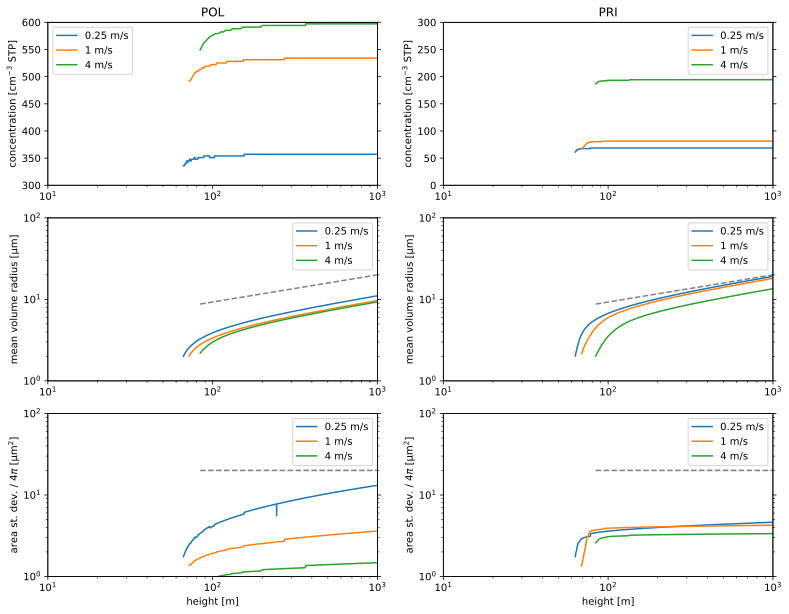

HTML(value="<a href='./fig3.pdf' target='_blank'>./fig3.pdf</a><br>")

In [14]:
fig, axs = pyplot.subplots(3, 2, figsize=(13, 10))
axN1,axN2,axR1,axR2,axA1,axA2 = [axs[0,0], axs[0,1], axs[1,0], axs[1,1], axs[2,0], axs[2,1]]

for aerosol, i in (("polluted",0),("pristine",1)):
    for w in vertical_velocity:
        r=np.array(output[w][aerosol]['products']['r_vol'])
        n=np.array(output[w][aerosol]['products']['n_act'])
        a=np.array(output[w][aerosol]['products']['area_std'])/(4*np.pi)
        axs[1,i].plot(np.array(output[w][aerosol]['products']['z']),np.where(r*10**6>2,r*10**6,np.nan))
        axs[0,i].plot(np.array(output[w][aerosol]['products']['z']),np.where(r*10**6>2,n*10**(-6),np.nan))
        axs[2,i].plot(np.array(output[w][aerosol]['products']['z']),np.where(r*10**6>2,a*10**12,np.nan))
    axs[1,i].plot(np.array(output[w][aerosol]['products']['z']),np.where(r*10**6>2,2*np.array(output[w][aerosol]['products']['z'])**(1/3),np.nan),color='grey',linestyle='--')
    axs[2,i].plot(np.array(output[w][aerosol]['products']['z']),np.where(r*10**6>2,20,np.nan),color='grey',linestyle='--')

for ax in [axN1,axN2,axR1,axR2,axA1,axA2]:
    ax.set_xlim(10,1000)
    ax.set_xscale('log')
    ax.legend(legend)
for ax in [axR1,axR2]:
    ax.set_ylabel('mean volume radius [μm]')
for ax in [axN1,axN2]:
    ax.set_ylabel('concentration [cm$^{-3}$ STP]')
for ax in [axA1,axA2]:
    ax.set_xlabel('height [m]')
    ax.set_ylabel(r'area st. dev. / 4$\pi$ [μm$^2$]')
    
axN1_, axN2_, axR1_, axR2_, axA1_, axA2_ = [axN1.twinx(),axN2.twinx(),axR1.twinx(),axR2.twinx(),axA1.twinx(),axA2.twinx()]
for ax in [axR1,axR2,axR1_,axR2_,axA1,axA2,axA1_,axA2_]:
    ax.set_yscale('log')
    ax.set_ylim(1,100)
for ax in [axN1,axN1_]:
    ax.set_ylim(300,600)
for ax in [axN2,axN2_]:
    ax.set_ylim(0,300)
axN1.set_title('POL')
axN2.set_title('PRI')
for ax in [axN1_,axN2_,axR1_,axR2_,axA1_,axA2_]:
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
show_plot("fig3.pdf")